In [1]:
import numpy as np
import cv2
import matplotlib 
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
img=cv2.imread("./test_images/test1.jpg")
img.shape

(259, 194, 3)

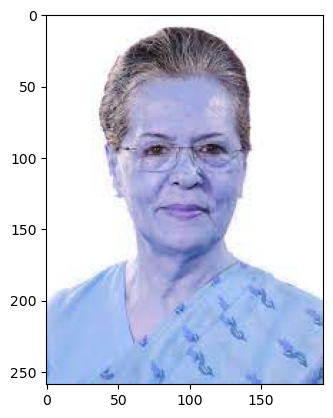

In [3]:
plt.imshow(img)

In [4]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(259, 194)

In [5]:
gray

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [198, 198, 199, ..., 157, 173, 173],
       [198, 198, 199, ..., 158, 173, 173],
       [198, 198, 199, ..., 161, 173, 173]], dtype=uint8)

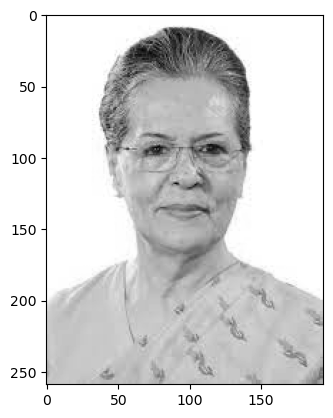

In [6]:
plt.imshow(gray,cmap="gray")

In [7]:
face_cascade=cv2.CascadeClassifier("./opencv/haar-cascade-files-master/haarcascade_frontalface_default.xml")
eye_cascade=cv2.CascadeClassifier('./opencv/haar-cascade-files-master/haarcascade_eye.xml')


faces=face_cascade.detectMultiScale(gray,1.3,5)
faces

array([[ 39,  48, 117, 117]])

In [8]:
(x,y,w,h)=faces[0] # coordinates starting x ,y  w-width h-height
x,y,w,h

(39, 48, 117, 117)

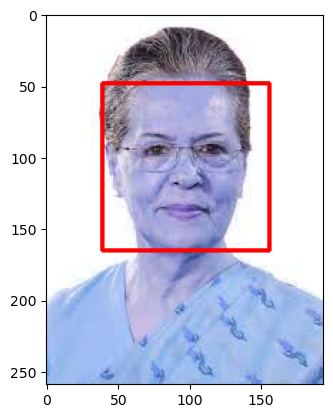

In [9]:
face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

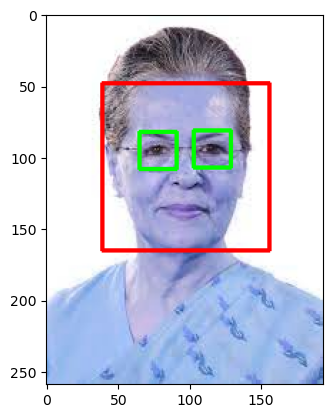

In [10]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray=gray[y:y+h,x:x+w]
    roi_color=face_img[y:y+h,x:x+w]
    eyes=eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        
plt.figure()
plt.imshow(face_img,cmap='gray')
plt.show()

In [20]:
# custom function to generate the face cut cropped image
def get_cropped_image_if_2_eyes(image_path):

    img=cv2.imread(image_path)
    if img is None:
        print(f"Error reading image: {image_path}")
        return None
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=face_cascade.detectMultiScale(gray,1.3,5)
    for (x,y,w,h) in faces:
        roi_gray=gray[y:y+h,x:x+w]
        roi_color=img[y:y+h,x:x+w]
        eyes=eye_cascade.detectMultiScale(roi_gray)
        if len(eyes)>=2:
            return roi_color # returns rate of interest

In [21]:
original_image=cv2.imread("./test_images/test1.jpg")

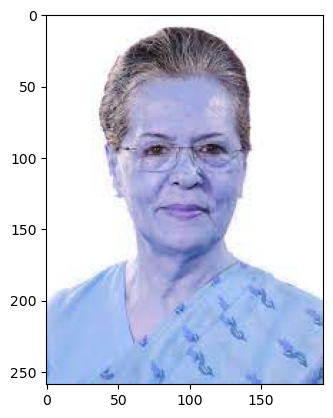

In [22]:
plt.imshow(original_image)

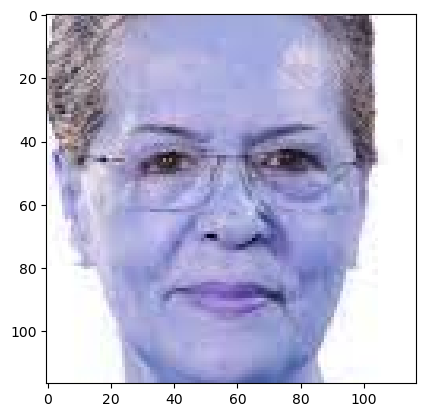

In [23]:
cropped_image=get_cropped_image_if_2_eyes("./test_images/test1.jpg")
plt.imshow(cropped_image)

In [24]:
cropped_image_noeye=get_cropped_image_if_2_eyes("./test_images/test3.jpg") #Empty

In [16]:
path_to_data="./dataset"
path_to_cr_data="./dataset/cropped"

In [33]:
import os
img_dirs=[]
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [34]:
img_dirs

['./dataset\\Amit_Shah',
 './dataset\\mk_stalin',
 './dataset\\nirmala_sitharaman',
 './dataset\\sonia_gandhi',
 './dataset\\Sushma_Swaraj']

In [30]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)    

In [35]:
cropped_image_dirs=[]
leader_file_names_dict={}

for img_dir in img_dirs:
    count=1
    leader_name=img_dir.split('\\')[-1]
    print(leader_name)
    
    leader_file_names_dict[leader_name]=[]
    
    for entry in os.scandir(img_dir):
        
        roi_color=get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder=path_to_cr_data+leader_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder....",cropped_folder)
            cropped_file_name=leader_name+str(count)+".png"
            cropped_file_path=cropped_folder+"/"+cropped_file_name
            
            cv2.imwrite(cropped_file_path,roi_color)
            leader_file_names_dict[leader_name].append(cropped_file_path)
            count+=1
    

Amit_Shah
Generating cropped images in folder.... ./dataset/croppedAmit_Shah
mk_stalin
Generating cropped images in folder.... ./dataset/croppedmk_stalin
nirmala_sitharaman
Generating cropped images in folder.... ./dataset/croppednirmala_sitharaman
sonia_gandhi
Generating cropped images in folder.... ./dataset/croppedsonia_gandhi
Sushma_Swaraj
Generating cropped images in folder.... ./dataset/croppedSushma_Swaraj


In [38]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [40]:
leader_file_names_dict

{'Amit_Shah': ['./dataset/croppedAmit_Shah/Amit_Shah1.png',
  './dataset/croppedAmit_Shah/Amit_Shah2.png',
  './dataset/croppedAmit_Shah/Amit_Shah3.png',
  './dataset/croppedAmit_Shah/Amit_Shah4.png',
  './dataset/croppedAmit_Shah/Amit_Shah5.png',
  './dataset/croppedAmit_Shah/Amit_Shah6.png',
  './dataset/croppedAmit_Shah/Amit_Shah7.png',
  './dataset/croppedAmit_Shah/Amit_Shah8.png',
  './dataset/croppedAmit_Shah/Amit_Shah9.png',
  './dataset/croppedAmit_Shah/Amit_Shah10.png',
  './dataset/croppedAmit_Shah/Amit_Shah11.png',
  './dataset/croppedAmit_Shah/Amit_Shah12.png',
  './dataset/croppedAmit_Shah/Amit_Shah13.png',
  './dataset/croppedAmit_Shah/Amit_Shah14.png',
  './dataset/croppedAmit_Shah/Amit_Shah15.png',
  './dataset/croppedAmit_Shah/Amit_Shah16.png',
  './dataset/croppedAmit_Shah/Amit_Shah17.png',
  './dataset/croppedAmit_Shah/Amit_Shah18.png',
  './dataset/croppedAmit_Shah/Amit_Shah19.png',
  './dataset/croppedAmit_Shah/Amit_Shah20.png',
  './dataset/croppedAmit_Shah/Amit_S

In [54]:
import pywt
import numpy as np
import cv2

def w2d(img,mode="haar",level=1):
    imArray=img
    
    #convert to grayScale
    imArray=cv2.cvtColor(imArray,cv2.COLOR_RGB2GRAY)
    
    #convert to float
    imArray=np.float32(imArray)
    imArray/=255
    #compute Cofficients
    coeffs=pywt.wavedec2(imArray,mode,level=level)
    
    #process cofficients
    coeffs_H=list(coeffs)
    coeffs_H[0]*=0
    
    imArray_H=pywt.waverec2(coeffs_H,mode)
    imArray_H*=255
    imArray_H=np.uint8(imArray_H)
    
    return imArray_H


In [47]:
cropped_image.shape

(117, 117, 3)

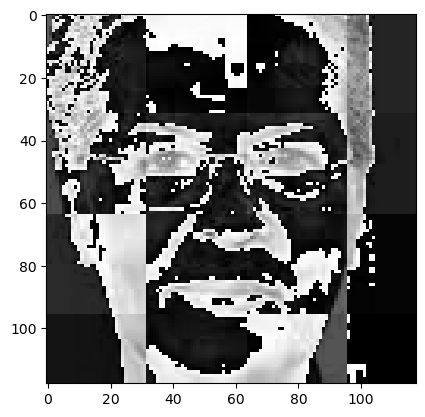

In [48]:
im_har=w2d(cropped_image,'db1',5)
plt.imshow(im_har,cmap='gray')

In [49]:
class_dict={}
count=0
for leader_name in leader_file_names_dict.keys():
    class_dict[leader_name]=count
    count+=1
class_dict    

{'Amit_Shah': 0,
 'mk_stalin': 1,
 'nirmala_sitharaman': 2,
 'sonia_gandhi': 3,
 'Sushma_Swaraj': 4}

In [67]:
X,Y=[],[]
for leader_name , training_files in leader_file_names_dict.items():
    for training_image in training_files:
        img=cv2.imread(training_image)
        if img is None:
           # print(f" Error in viewing this image {training_image}")
            continue
        scalled_raw_img=cv2.resize(img,(32,32))
        img_har=w2d(img,'db1',5)
        scalled_img_har=cv2.resize(img_har,(32,32))
        
        #stacking vertical the raw image and transformed image
        
        combined_img=np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        Y.append(class_dict[leader_name])

In [68]:
X[0]

array([[142],
       [153],
       [219],
       ...,
       [ 35],
       [ 33],
       [227]], dtype=uint8)

In [69]:
len(X)

673

In [71]:
X=np.array(X).reshape(len(X),4096).astype(float)

In [73]:
X[0]

array([142., 153., 219., ...,  35.,  33., 227.])

In [75]:
X.shape

(673, 4096)

In [76]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

from sklearn.metrics import classification_report

In [77]:
X_train,X_test , Y_train,Y_test = train_test_split(X,Y, random_state=0)

pipe=Pipeline([ ('scaler' , StandardScaler()) , ('svc', SVC(kernel='rbf' ,C=10)) ])
pipe.fit(X_train,Y_train)
pipe.score(X_test,Y_test)

0.9349112426035503

In [79]:
print(classification_report(Y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        34
           1       0.97      0.94      0.95        32
           2       0.93      0.91      0.92        46
           3       0.90      1.00      0.95        35
           4       0.95      0.86      0.90        22

    accuracy                           0.93       169
   macro avg       0.94      0.93      0.93       169
weighted avg       0.94      0.93      0.93       169



In [81]:
# use gridSeacrhCv to hypertune parameters and model selection
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression



from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [83]:
model_params= {
    'svm':{
        'model':svm.SVC(gamma='auto',probability=True),
    'params':{
        'svc__C':[1,10,50,100],
        'svc__kernel':['rbf','linear']
    }
    },
    
    'random_forest':{
        'model':RandomForestClassifier(),
        'params':{'randomforestclassifier__n_estimators':[1,5,10]}
    },
    
    'logistic_regression':{
        'model':LogisticRegression(solver='liblinear',multi_class='auto'),
        'params':{'logisticregression__C':[1,5,10]}
    }
}

In [84]:
scores=[]
best_estimators={}
import pandas as pd
for algo,mp in model_params.items():
    pipe=make_pipeline(StandardScaler(),mp['model'])
    clf=GridSearchCV(pipe,mp['params'],cv=5,return_train_score=False)
    clf.fit(X_train,Y_train)
    scores.append({
        'model':algo,
        'best_score':clf.best_score_,
        'best_params':clf.best_params_
    })
    best_estimators[algo]=clf.best_estimator_
df=pd.DataFrame(scores,columns=['model','best_score','best_params'])
df
    


,model,best_score,best_params
0,svm,0.930614,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.730198,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.952416,{'logisticregression__C': 5}


In [87]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=5, solver='liblinear'))])}

In [88]:
#using xtest and y test for validation
best_estimators['logistic_regression'].score(X_test,Y_test) #highest score hence choosing svm

0.9644970414201184

In [89]:
best_estimators['svm'].score(X_test,Y_test)

0.9585798816568047

In [90]:
best_estimators['random_forest'].score(X_test,Y_test)

0.8106508875739645

In [91]:
best_clf=best_estimators['logistic_regression']


In [92]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,best_clf.predict(X_test))
cm

array([[33,  0,  0,  1,  0],
       [ 2, 30,  0,  0,  0],
       [ 0,  0, 44,  2,  0],
       [ 0,  0,  0, 35,  0],
       [ 0,  0,  0,  1, 21]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

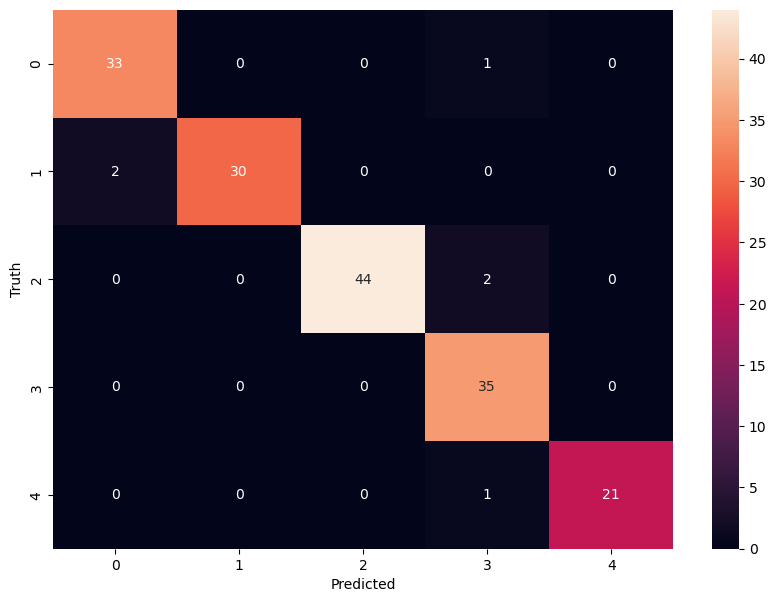

In [94]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel("Truth")

In [95]:
class_dict

{'Amit_Shah': 0,
 'mk_stalin': 1,
 'nirmala_sitharaman': 2,
 'sonia_gandhi': 3,
 'Sushma_Swaraj': 4}

In [97]:
import joblib

joblib.dump(best_clf,'saved_model.pk1')

['saved_model.pk1']

In [98]:
import json
with open("class_dictory.json","w") as f:
    f.write(json.dumps(class_dict))